<a href="https://colab.research.google.com/github/Sompote/transformer_RIC/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade keras-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.1/880.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 27.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.1.1 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.4.0 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [19]:
#Transformer prediciton to predict RIC combind model by Dr. Sompote Youwai 2023
import numpy as np
import pandas as pd

# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

#import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, Flatten, concatenate,Reshape, Dropout,Bidirectional,LayerNormalization
from keras.layers import MaxPooling1D
from keras.layers import LSTM, Dense
from keras.metrics import MeanAbsolutePercentageError
from keras import *
from keras.optimizers import Adam
import keras_nlp

df = pd.read_excel('/content/drive/MyDrive/RIC/RIC15aug.xlsx')
data=np.array(df)
X=data[:,1:29]
Y=data[:,34:62]
x_featured=data[:,29:32]


In [4]:
transformer = models.load_model('/content/drive/MyDrive/RIC/train_model/model1/transformer_medium_final.h5')

In [212]:
transformer.summary()

Model: "Transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 LSTM_input (InputLayer)     [(None, 28, 4)]              0         []                            
                                                                                                  
 CNN_input (InputLayer)      [(None, 28, 4)]              0         []                            
                                                                                                  
 layer_normalization_10 (La  (None, 28, 4)                8         ['LSTM_input[0][0]']          
 yerNormalization)                                                                                
                                                                                                  
 position_embedding_2 (Posi  (None, 28, 4)                112       ['CNN_input[0][0]'] 

In [6]:
import pickle #download weight scaler
scaler_x = pickle.load(open('/content/drive/MyDrive/RIC/train_model/model_final/scaler_x-2.pkl', 'rb'))
scaler_y = pickle.load(open('/content/drive/MyDrive/RIC/train_model/model_final/scaler_y-3.pkl', 'rb'))
scaler_f = pickle.load(open('/content/drive/MyDrive/RIC/train_model/model_final/scaler_f-2.pkl', 'rb'))

In [15]:
#prepare data
feature=np.array([50,18,0.5])
#feature=np.reshape(feature,(1,-1))
sample=2
Xd=X[sample-1:sample]
feature=x_featured[sample-1:sample]
feature=np.array([50,5,3])
feature=np.reshape(feature,(1,-1))

x_train = scaler_x.transform(Xd)
x_feature=scaler_f.transform(feature)
y_ini=np.zeros((1,28))
y_ini[0,0]=0
#y_ini=scaler_y.transform(y_ini)

def CNN_tensor(X,X_feature):
  X_train_CNN=np.zeros((X.shape[0],X.shape[1],X_feature.shape[1]+1))
  X_train_CNN[:,:,0]=x_train
  for i in range(0,(X.shape[0])):
    X_train_CNN[i,:,1]=x_feature[i,0]
    X_train_CNN[i,:,2]=x_feature[i,1]
    X_train_CNN[i,:,3]=x_feature[i,2]
  return X_train_CNN
X_cnn=CNN_tensor(x_train,x_feature)


In [13]:
feature


array([[50., 10.,  3.]])

In [16]:
for step in range(0,27):
  y=transformer.predict([x_feature,X_cnn, X_cnn,y_ini])
  y_ini[0,step+1]=y

y_pred=scaler_y.inverse_transform(y_ini)


1/1 [==============================] - 0s 48ms/step


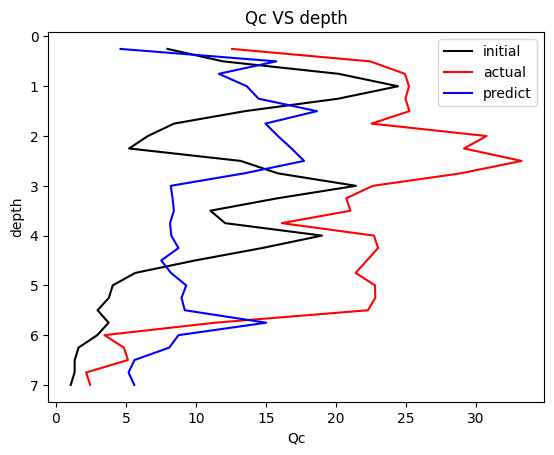

In [17]:
import matplotlib.pyplot as plt

# Define the x-axis and corresponding y-axis values as lists

ydist=[0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7]


# Plot them on canvas using plt.plot() function
plt.plot(X[sample-1], ydist,color='black',label='initial')
plt.plot(Y[sample-1], ydist,color='red',label='actual')
plt.plot(y_pred[0], ydist,color='blue',label='predict')
plt.legend()


# Give a name to x-axis and y-axis using plt.xlabel() and plt.ylabel() functions
plt.xlabel("Qc")
plt.ylabel("depth")

# Give a title to your plot using plt.title() function
plt.title("Qc VS depth")
# Get the current axes instance
ax = plt.gca()

# Invert the y-axis
ax.invert_yaxis()

# Finally, to view your plot, we use plt.show() function
plt.show()

In [232]:
np.savetxt('array5.csv', y_pred, delimiter=',')

In [ ]:
#preparing data for training each time step for each Y data using concept seq2seq
def encoder_f(x_f,time_step): #feature encoder same feature in each sample
  shape=x_f.shape
  x=x_f
  step=time_step
  x_sum_t=x[0:1,:]
  for time in range(1,time_step):
    x_sum=x[0:1,:]
    x_sum_t=np.append(x_sum_t,x_sum,axis=0)
  sum_X=x_sum_t

  for sample in range(1,shape[0]):
    x_sum_ts=x[sample:sample+1,:]

    for time in range(1,time_step):
        x_sum=x[sample:sample+1,:]
        #x_sum=np.reshape(x_sum,(1,x_sum.shape[0],x_sum.shape[1]))


        x_sum_ts=np.append(x_sum_ts,x_sum,axis=0)

    sum_X=np.append(sum_X,x_sum_ts,axis=0)
  return sum_X

#prepare x in encoder #enter CNN and use similar encode for  smaple in diffrent time step
def encoder_x(x_cnn):
  shape=x_cnn.shape
  x=x_cnn

  x_sum_t=x[0:1,:,:]
  for time in range(1,shape[1]):
    x_sum=x[0:1,:,:]
    x_sum=np.reshape(x_sum,(1,x_sum.shape[1],x_sum.shape[2]))
    x_sum_t=np.append(x_sum_t,x_sum,axis=0)

  sum_X=x_sum_t

  for sample in range(1,shape[0]):
    x_sum_ts=x[sample:sample+1,:,:]

    for time in range(1,shape[1]):
        x_sum=x[sample,:,:]
        x_sum=np.reshape(x_sum,(1,x_sum.shape[0],x_sum.shape[1]))
        x_sum_ts=np.append(x_sum_ts,x_sum,axis=0)

    sum_X=np.append(sum_X,x_sum_ts,axis=0)
  return sum_X

def padding(x_pad,shift=1): #padding time shift right -shift right =1
  xt=x_pad
  if (shift>0):
    ap=np.zeros((xt.shape[0],shift))
    xt=np.concatenate((ap,xt), axis=1)
  xt_1 = xt[0,0:1]
  xt_p1=  np.pad(xt_1, (0, xt.shape[1]-1), mode='constant')
  x_sum=xt_p1
  for i in range(1,x_train.shape[1]):
    xt_t = xt[0,0:i+1]
    xt_pt=  np.pad(xt_t, (0, xt.shape[1]-xt_t.shape[0]), mode='constant')

    x_sum=np.vstack((x_sum, xt_pt))
  return x_sum

#padding time shift right -shift right =1 prepare the squence for decoder usinhe previous time step
def padding_full(x_pad,shift=1):
  xt=x_pad
  if (shift>0):
    ap=np.zeros((xt.shape[0],shift))
    xt=np.concatenate((ap,xt), axis=1)

  xt_1 = xt[0,0:1]
  xt_p1=  np.pad(xt_1, (0, xt.shape[1]-1), mode='constant')
  x_sum=xt_p1
  for i in range(1,x_train.shape[1]):
    xt_t = xt[0,0:i+1]
    xt_pt=  np.pad(xt_t, (0, xt.shape[1]-xt_t.shape[0]), mode='constant')

    x_sum=np.vstack((x_sum, xt_pt))
  x_sum_train=x_sum

  for num_s in range(1,xt.shape[0]):
    xt_1 = xt[num_s,0:1]
    xt_p1=  np.pad(xt_1, (0, xt.shape[1]-1), mode='constant')
    x_sum=xt_p1
    for i in range(1,x_train.shape[1]):
      xt_t = xt[0,0:i+1]
      xt_pt=  np.pad(xt_t, (0, xt.shape[1]-xt_t.shape[0]), mode='constant')

      x_sum=np.vstack((x_sum, xt_pt))
    x_sum_train =np.vstack((x_sum_train, x_sum))

  return x_sum_train

def out_put(y_train): #prepare y_value each step
  y_t=y_train

  y_sum=y_t[0,0]

  for time in range(1,y_t.shape[1]):
    y_sum=np.vstack((y_sum,y_t[0,time]))
  ysum_t=y_sum

  for nums in range(1,y_t.shape[0]):
    y_sum=y_t[nums,0]
    for time in range(1,y_t.shape[1]):
      y_sum=np.vstack((y_sum,y_t[0,time]))

    ysum_t=np.vstack((ysum_t,y_sum))
  return ysum_t




x_f=encoder_f(x_feature,28)
x_train_encoder=encoder_x(X_train_CNN)
y_decode=padding_full(x_pad=y_train, shift=1)
y_decode = np.delete (y_decode, -1, axis=1)
y_train=out_put(y_train)


In [ ]:
def mape(y_true, y_pred):
  mape=np.mean(np.abs((y_true - y_pred)/y_true ))*100
  # return mean of percentage errors
  return mape


def mae(y_true, y_pred):
  mae=np.mean(np.abs(y_true - y_pred))
  # return mean of percentage errors
  return mae

x_train = scaler_x.transform(X)
x_feature=scaler_f.transform(x_featured)

y_ini=np.zeros((1,28))
y_ini[0,0]=0
#y_ini=scaler_y.transform(y_ini)

def CNN_tensor(X,X_feature):
  X_train_CNN=np.zeros((X.shape[0],X.shape[1],X_feature.shape[1]+1))
  X_train_CNN[:,:,0]=x_train
  for i in range(0,(X.shape[0])):
    X_train_CNN[i,:,1]=x_feature[i,0]
    X_train_CNN[i,:,2]=x_feature[i,1]
    X_train_CNN[i,:,3]=x_feature[i,2]
  return X_train_CNN
X_cnn=CNN_tensor(x_train,x_feature)

y=model_transform.predict([X_feature_test,X_test, X_test,y_d_test])

#_pred=sc_y.inverse_transform(y)

mape=mape(Y_test,y)
mae=mae(Y_test,y)

print('MAPE=', mape)
print('MAE=', mae)


data=np.array(df)
X=data[:,1:29]
Y=data[:,34:62]
x_featured=data[:,29:32]
